In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [81]:
X, Y = make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state = 10)
print(X.shape, Y.shape)

(500, 2) (500,)


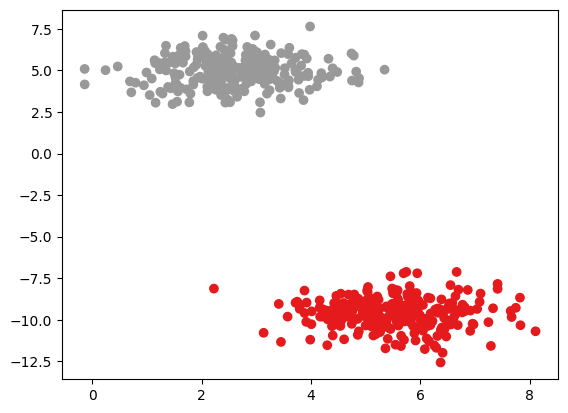

In [82]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap =plt.cm.Set1)
plt.show()

In [83]:
def sigmoid(z):

    return (1.0)/(1+np.exp(-z))

In [84]:
def predict(X, weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

In [85]:
def loss(X,  Y, weights):
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

In [86]:
def update(X, Y , weights, learning_rate):
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [87]:
def train(X, Y, learning_rate, maxEpochs = 100):
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))

    weights = np.zeros(X.shape[1])

    for epoch in range(maxEpochs):
        weights = update(X, Y, weights, learning_rate)
        if epoch % 10 == 0:
            l = loss(X, Y, weights)

            print("Epoch Number %d Loss %.4f"%(epoch, l))

    return weights

In [88]:
weights = train(X,Y, learning_rate=0.01)

Epoch Number 0 Loss 0.5665
Epoch Number 10 Loss 0.2029
Epoch Number 20 Loss 0.1275
Epoch Number 30 Loss 0.0937
Epoch Number 40 Loss 0.0742
Epoch Number 50 Loss 0.0616
Epoch Number 60 Loss 0.0527
Epoch Number 70 Loss 0.0460
Epoch Number 80 Loss 0.0409
Epoch Number 90 Loss 0.0368


In [89]:
def get_preds(X_test,weights, labels = True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.one(X_test.shape[0],1)
        X_test = np.hstack(ones, X_test)
    probs = predict(X_test, weights)

    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

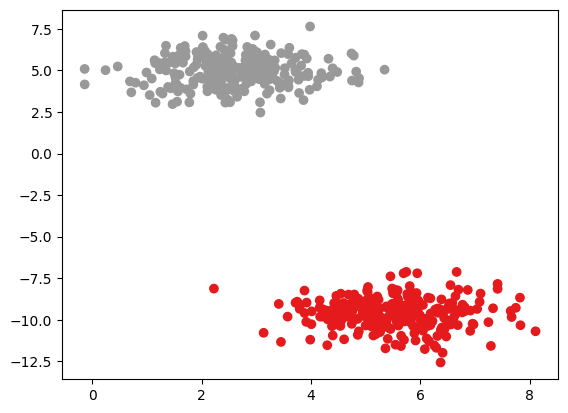

In [90]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap =plt.cm.Set1)
plt.show()

In [91]:
weights

array([0.046117  , 0.04840512, 0.55270932])

In [92]:
x1 = np.linspace(-2, 10, 10)
print(x1)
x2 = -(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[ 0.09171773 -0.02505281 -0.14182334 -0.25859387 -0.37536441 -0.49213494
 -0.60890547 -0.72567601 -0.84244654 -0.95921707]


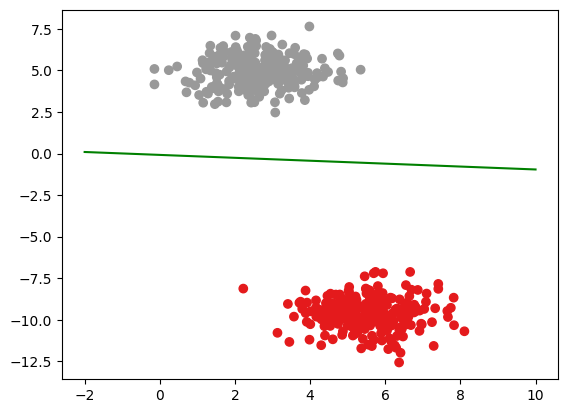

In [93]:
plt.scatter(X[:,0],X[:,1],c = Y,cmap =plt.cm.Set1)
plt.plot(x1, x2, c = "green")
plt.show()